### Import dataset

In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import math
df = pd.read_csv("games.csv") # Import als df, Komma als seperator
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


### Einfache Beschreibung des Datensatzes

In [30]:
print('Anzahl der Spiele:', len(df))
print('Davon gewertete Spiele:', len(df[df["rated"] == True]), '(entspricht', 100 * round(len(df[df["rated"] == True])/len(df), 4) ,'%)')
print()
print('Minimale Anzahl gezogener Züge:', df["turns"].min())
print('Maximale Anzahl gezogener Züge:', df["turns"].max())
print('Durchschnittliche Anzahl gezogener Züge:', df["turns"].mean())
print()
print('Partieausgang:')
print('Schachmatt:', 100 * round(len(df[df["victory_status"] == "mate"])/len(df), 4), '%')
print('Aufgabe:', 100 * round(len(df[df["victory_status"] == "resign"])/len(df), 4), '%')
print('Ablauf der Zeit:', 100 * round(len(df[df["victory_status"] == "outoftime"])/len(df), 4), '%')
print('Remis:', 100 * round(len(df[df["victory_status"] == "draw"])/len(df), 4), '% (Remis bei Ablauf der Zeit hier nicht mit eingerechnet)')
print()
print('Anteil der gewonnen Spiele:') 
print('Weiß:', 100 * round(len(df[df["winner"] == "white"])/len(df), 4), '%')
print('Schwarz:', 100 * round(len(df[df["winner"] == "black"])/len(df), 4), '%')
print('Remis:', 100 * round(len(df[df["winner"] == "draw"])/len(df), 4), '%')
print()
# Unterteile Zeitbegrenzung in Bullet(1-2), Blitz(3-7), Rapid(8-22) und Classical(23-180), ignoriere Inkremente
# Erstelle zunächst Variable mit Zeitbegrenzung ohne Inkrement als Integer
# df["time_control"] = np.nan
# for i in range(len(df)):
#     df["time_control"][i] = int(df["increment_code"][i].partition("+")[0])
print('Zeitbegrenzung der Spiele:') 
print('Bullet (1-2 Minuten):', 100 * round(len(df[df["time_control"] <= 2])/len(df), 4), '%')
print('Blitz (3-7 Minuten):', 100 * round(len(df[(df["time_control"] >= 3) & (df["time_control"] <= 7)])/len(df), 4), '%')
print('Rapid (8-20 Minuten):', 100 * round(len(df[(df["time_control"] >= 8) & (df["time_control"] <= 22)])/len(df), 4), '%')
print('Classical (25-180 Minuten):', 100 * round(len(df[df["time_control"] >= 23])/len(df), 4), '%')
print()
print('Anzahl Spieler:', len(df["white_id"].unique()) + len(df["black_id"].unique()))
print('Durschnittliche Anzahl Spiele pro Spieler:',  round((2 * len(df)) / (len(df["white_id"].unique()) + len(df["black_id"].unique())), 2))
print()
print('Kleinste Spielerwertung (ELO):', min(df[["white_rating", "black_rating"]].min()))
print('Größte Spielerwertung:', max(df[["white_rating", "black_rating"]].max()))
print('Durchschnittliche Spielerwertung:', round(sum(df[["white_rating", "black_rating"]].sum()) / (2 *len(df))))
print()
print('Erster Zug:')
df["first_move"] = np.nan
for i in range(len(df)):
    df["first_move"][i] = df["moves"][i].partition(' ')[0]
for i in df["first_move"].unique():
    print(i + ':', round(100 * len(df[df["first_move"] == i])/len(df), 2), '%', )
print()
print('Gespielte Eröffnungen:')
for i in df["opening_name"].unique():
    if len(df[df["opening_name"] == i])/len(df) > 0.01:
        print(i + ':', round(100 * len(df[df["opening_name"] == i])/len(df), 2), '%', )


# Evtl. hier noch Eröffnungszug und Eröffnung

Anzahl der Spiele: 20058
Davon gewertete Spiele: 16155 (entspricht 80.54 %)

Minimale Anzahl gezogener Züge: 1
Maximale Anzahl gezogener Züge: 349
Durchschnittliche Anzahl gezogener Züge: 60.46599860404826

Partieausgang:
Schachmatt: 31.53 %
Aufgabe: 55.57 %
Ablauf der Zeit: 8.38 %
Remis: 4.52 % (Remis bei Ablauf der Zeit hier nicht mit eingerechnet)

Anteil der gewonnen Spiele:
Weiß: 49.86 %
Schwarz: 45.4 %
Remis: 4.74 %

Zeitbegrenzung der Spiele:


KeyError: 'time_control'

In [ ]:
df["first_move"] = np.nan
for i in range(len(df)):
    df["first_move"][i] = df["moves"][i].partition(' ')[0]
for i in df["first_move"].unique():
    print(i + ':', round(100 * len(df[df["first_move"] == i])/len(df), 2), '%', )


d4: 22.54 %
e4: 62.81 %
e3: 2.07 %
c4: 3.57 %
Nf3: 3.61 %
a4: 0.14 %
Nh3: 0.07 %
g3: 0.93 %
h4: 0.16 %
f4: 0.83 %
b4: 0.44 %
Nc3: 0.49 %
b3: 0.86 %
h3: 0.07 %
d3: 0.65 %
f3: 0.11 %
g4: 0.19 %
a3: 0.13 %
c3: 0.28 %
Na3: 0.02 %


### Now depending on rating
- Work in Progress

In [ ]:
dfr = df[df["rated"]] # Create DF with only rated games
dfr["avg_rating"] = (dfr["white_rating"] + dfr["black_rating"])/2 # Erstelle Variable mit durchscnittlichem Rating beider Spieler pro Spiel
# dfr["avg_rating"].hist()
print("Min rating:", dfr["avg_rating"].min())
print("Max rating:", dfr["avg_rating"].max())
cont = (dfr["avg_rating"].max() - dfr["avg_rating"].min())/5 # Unterteilung für Spielstärken, 5 Bereiche

Min rating: 816.5
Max rating: 2475.5


In [ ]:
for i in range(1,6): 
     print(dfr["avg_rating"].min() + (i-1)*cont, "to", dfr["avg_rating"].min() + i*cont, "White:", dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont][dfr["winner"] == "white"].count()[0]/len(dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont]))
     print(dfr["avg_rating"].min() + (i-1)*cont, "to", dfr["avg_rating"].min() + i*cont, "Black:", dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont][dfr["winner"] == "black"].count()[0]/len(dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont]))
     print(dfr["avg_rating"].min() + (i-1)*cont, "to", dfr["avg_rating"].min() + i*cont, "Draw:", dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont][dfr["winner"] == "draw"].count()[0]/len(dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont]))


816.5 to 1148.3 White: 0.4826989619377163
816.5 to 1148.3 Black: 0.47058823529411764
816.5 to 1148.3 Draw: 0.04671280276816609
1148.3 to 1480.1 White: 0.5104748603351955
1148.3 to 1480.1 Black: 0.45006983240223464
1148.3 to 1480.1 Draw: 0.03945530726256983
1480.1 to 1811.9 White: 0.5026851998104565
1480.1 to 1811.9 Black: 0.4566419207076291
1480.1 to 1811.9 Draw: 0.04067287948191439
1811.9 to 2143.7 White: 0.49952335557673977


1811.9 to 2143.7 Black: 0.45764219891960595
1811.9 to 2143.7 Draw: 0.04283444550365428
2143.7 to 2475.5 White: 0.4984523956914696
2143.7 to 2475.5 Black: 0.4571004085675375
2143.7 to 2475.5 Draw: 0.04444719574099294


The following code is to find out how often better ratings win?

 Players with higher rating win 61.696069328381306 % of the games.


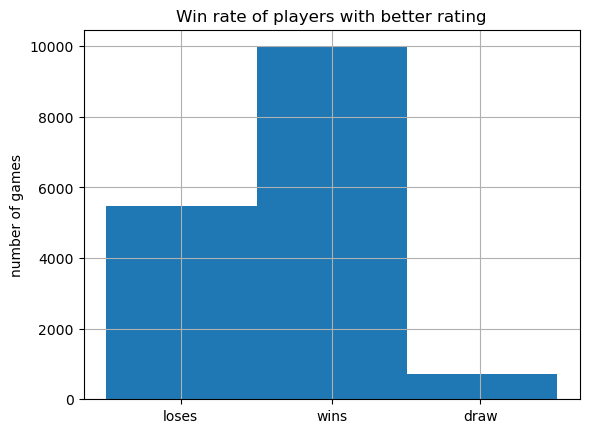

In [ ]:
def who_wins_rating(row)->int:              #lower rating wins:0, higher rating wins: 1, draw: 2
    if row["winner"]=="draw":
        return 2
    else:
        return int(row[row["winner"]+ "_rating"]>row["avg_rating"])
dfr["higher_rating_wins"] = dfr.apply(who_wins_rating, axis=1)


print(" Players with higher rating win " + str(sum(dfr["higher_rating_wins"]==1)/len(dfr)*100) + " % of the games.")
dfr_temp = dfr["higher_rating_wins"].hist(bins=3)

plt.xticks([0.33,1,1.66],["loses", "wins", "draw"])
plt.title("Win rate of players with better rating")
plt.ylabel("number of games")
plt.show()


Which game is which type of chess? (Normal, Rapid, Blitz) I am not sure if have divided the games corretly furthermore I wonder how I can investigate for statistical significance when values are eiteh win or lose and not normal distributed

In [ ]:
def time_type(time_and_inc: str)-> str:
    pos = time_and_inc.find('+')
    time = int(time_and_inc[:pos])
    inc = int(time_and_inc[pos:])
    time=time+inc                   #hier ist die frage, wie die Spiele eingeordnet werden ich hbae das ertstmla nach fide gemacht, aber geht auch nach lichess
    if time<=10:
        return "Blitz"
    elif (time > 10) & (time<=60):
        return "Rapid"
    else:
        return "Normal"
    
dfr["time_type"]=dfr["increment_code"].apply(time_type)
occurrence_of_types=dfr["time_type"].value_counts()
print(occurrence_of_types, "\n")


win_or_draw=["Higher Rating wins" ,"Draw"]
time_types = ["Blitz" , "Rapid" , "Normal"]
for n in (1,2):
    for m in [0, 1, 2]:
        tmp=dfr[dfr["time_type"]==time_types[m]]
        tmp[(tmp["higher_rating_wins"]==2)]=0
        tmp=tmp["higher_rating_wins"].std()
        print(win_or_draw[n-1] + " in " + time_types[m] + " " + str(len(dfr[(dfr["higher_rating_wins"]==n) & (dfr["time_type"]==time_types[m])])/occurrence_of_types[m]*100) + " " +  ", mu = "+ str(tmp))
del tmp

#trying to do a t-test, but does not seem good:
a = dfr[(dfr["time_type"]==time_types[1])]
a = (a["higher_rating_wins"])
a = a.to_numpy()
b = dfr[(dfr["time_type"]==time_types[2])]
b = (b["higher_rating_wins"])
b = b.to_numpy()
print ( "\n", stats.ttest_ind(a,b) , "\n")



time_type_and_winrate = np. zeros((3,3))
for m in [0,1,2]:               #create a 3x3 matrix in with lines: who wins and columns: which time type
    for n in [0,1,2]:
        time_type_and_winrate[(m,n)] = len(dfr[(dfr["time_type"]==time_types[m]) & (dfr["higher_rating_wins"]==n)])
    


ttwr_rel = (np.transpose(time_type_and_winrate)/np.sum(np.transpose(time_type_and_winrate),axis=0))*100  #geht vom prozentualen in jedem time_type einzeln aus
print("                     Bltiz       Rapid      Normal")
print("lower rating wins ", ttwr_rel[0,:3])
print("higher rating wins", ttwr_rel[1,:3])
print("draw              ", ttwr_rel[2,:3])

chi2_time_and_win = stats.chi2_contingency(ttwr_rel) #je nachdem, was man nimmt, relative zahlen oder absolute, kommt etwas ganz anderes raus, ist das so richtig? Ich weiß auch gar nicht, ob das so richtig ist. Zumindest bei relativen Zahlen kommen ja gar nicht die ANzahl an messpunkten mit rein

print("\nWith a p-value of p = " , chi2_time_and_win[1]*100 , " %, the variables game length and wins in dependence of rating are dependent from each other. \n I AM NOT SURE IF I DID THE ANALYSIS RIGHT IS THIS TEST CORRECT??")


Blitz     8333
Rapid     7567
Normal     255
Name: time_type, dtype: int64 

Higher Rating wins in Blitz 62.10248409936398 , mu = 0.485161040006867
Higher Rating wins in Rapid 61.00171798599181 , mu = 0.4877782928083753
Higher Rating wins in Normal 69.01960784313725 , mu = 0.4633220092295742
Draw in Blitz 4.128165126605064 , mu = 0.485161040006867
Draw in Rapid 4.664992731597727 , mu = 0.4877782928083753
Draw in Normal 8.627450980392156 , mu = 0.4633220092295742

 Ttest_indResult(statistic=-4.55894215941538, pvalue=5.2193597756141385e-06) 

                     Bltiz       Rapid      Normal
lower rating wins  [33.76935077 34.33328928 22.35294118]
higher rating wins [62.1024841  61.00171799 69.01960784]
draw               [4.12816513 4.66499273 8.62745098]

With a p-value of p =  22.26219688220277  %, the variables game length and wins in dependence of rating are dependent from each other. 
 I AM NOT SURE IF I DID THE ANALYSIS RIGHT IS THIS TEST CORRECT??


Win rate for players with higher rating in dependence from rating difference. 
-maybe add some errorbars in plot did it, need more data!!!--> maybe only look at whole data

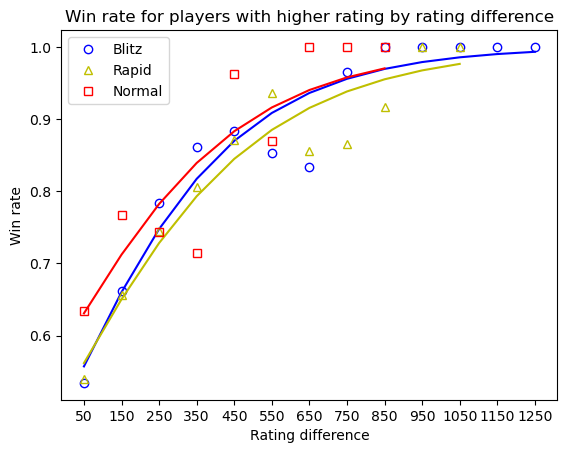

In [ ]:
def res_growth(x, S,  k):
    return S - (S - 1) * np.exp(-k**x)

dfr[dfr["higher_rating_wins"]==1].head()
dfr["rating_dif"]=abs(dfr["white_rating"]-dfr["black_rating"])

max_rating_dif = dfr["rating_dif"].max()
min_rating_dif = dfr["rating_dif"].min()
#rating_spacing = np.linspace(min_rating_dif,max_rating_dif,int((max_rating_dif-min_rating_dif)/100))
rating_spacing = np.linspace(0,1300,14)

colour_types=['b' ,'y' ,'r']
marker_types=["o", "^", "s"]
for m in [1, 2, 3]:
    #xcoor=dfr[(dfr["time_type"]==thistime) & (dfr["higher_rating_wins"]==1)]
    dfr_temp=dfr[(dfr["time_type"]==time_types[m-1])]
    rating_mean = np.linspace(0,0,len(rating_spacing)-1)
    h_r_w_in_group = np.linspace(0,0,len(rating_spacing)-1)
    h_r_w_in_group_std = np.linspace(0,0,len(rating_spacing)-1)


    for n in range (0, int(len(rating_spacing)-1)):
        rating_mean[n] = np.mean([rating_spacing[n],rating_spacing[n+1]])
        dfr_temp2 = dfr_temp[(dfr_temp["rating_dif"]>=rating_spacing[n]) & (dfr_temp["rating_dif"]<=rating_spacing[n+1])]
        dfr_temp2 = dfr_temp2[dfr_temp2["higher_rating_wins"]!=2]
        h_r_w_in_group[n] = dfr_temp2["higher_rating_wins"].mean()
        h_r_w_in_group_std[n] = dfr_temp2["higher_rating_wins"].std()
    plt.figure(1)
    #plt.errorbar(rating_mean,h_r_w_in_group,h_r_w_in_group_std,label=thistime,markerfacecolor='none',marker="o")
    plt.plot(rating_mean,h_r_w_in_group,label=time_types[m-1],marker=marker_types[m-1], markerfacecolor='none',color=colour_types[m-1],linestyle='none')



    index_not_nan = (np.isnan(h_r_w_in_group)) == 0
    fit = curve_fit(res_growth,rating_mean[index_not_nan],h_r_w_in_group[index_not_nan], maxfev = 1000)
    fitted_data=res_growth(rating_mean[index_not_nan],*fit[0])
    plt.plot(rating_mean[index_not_nan],fitted_data,color=colour_types[m-1])


    #plt.figure()
    #plt.title("Rating differences in " + thistime[m-1])
    #hist=dfr_temp["rating_dif"].hist(bins=20)
 

plt.figure(1)
plt.legend()
plt.xlabel("Rating difference")
plt.ylabel("Win rate")
plt.title("Win rate for players with higher rating by rating difference")
plt.xticks(np.linspace(50,1250,13))
plt.show()
#ycoor=ycoor["higher_rating_wins"]


#plt.plot(xcoor,ycoor)
#dfr["increment_code"].unique()

### Test for rochades
- do rochades help to win the game? A first simple analysis is ready (apart from a good statistical analysis) but further analysis is possible.


In [ ]:
def roch_q(moves: str) -> str:
    out= "none"
    
    if (moves.count(" O-O ")==1) & (moves.count("O-O-O")==0):
        index = moves.index(" O-O ")+1 
        if moves[0:index].count(" ") % 2 == 1:
            out = "b"
        else:
            out = "w"
    elif (moves.count(" O-O ")==0) & (moves.count("O-O-O")==1):
        index = moves.index("O-O-O")+1 
        if moves[0:index].count(" ") % 2 == 1:
            out = "B"
        else:
            out = "W"
    elif (moves.count(" O-O ")==1) & (moves.count("O-O-O")==1):
        index = moves.index("O-O-O")+1 
        if moves[0:index].count(" ") % 2 == 1:
            out = "B"
        else:
            out = "W"
        index = moves.index(" O-O ")+1
        if moves[0:index].count(" ") % 2 == 1:
            out = out + "b"
        else:
            out = out + "w"
    elif moves.count(" O-O ")==2:
        out = "both"
    elif moves.count("O-O-O")==2:
        out = "BOTH"
    return out

dfr["rochade"] = dfr["moves"].apply(roch_q)

#to have the information gathered in a matrix:
who_wins_colour_and_rochade = np.zeros((3,9))          
roch = ["none", "both", "BOTH", "w", "b", "W", "B", "Wb", "Bw"]
winner = ["white", "black", "draw" ]
for m in [0,1,2]:
    for n in range(0,9):
        who_wins_colour_and_rochade[(m,n)] = len(dfr[(dfr["winner"]==winner[m]) & (dfr["rochade"]==roch[n])])

# who_wins and rochade zusammengefasst zu beide oder keiner Rochade und w oder s Rochade:
wc_rs = np.zeros((3,3))  
wc_rs[:3,0] = np.sum(who_wins_colour_and_rochade[:3,np.array([0,1,2,7,8])],axis=1)
wc_rs[:3,1] = np.sum(who_wins_colour_and_rochade[:3,np.array([3,5])],axis=1)
wc_rs[:3,2] = np.sum(who_wins_colour_and_rochade[:3,np.array([4,6])],axis=1)
wc_rs_rel = wc_rs/np.sum(wc_rs,axis=0)*100
chi2_roch_and_win = stats.chi2_contingency(wc_rs_rel)
print("in absoltene Zahlen (Beschreibung wie unten):\n" , wc_rs, "\n")
print("             no/both rochade  white rochade  black rochade")
print("white wins ", wc_rs_rel[0,:3])
print("black wins ", wc_rs_rel[1,:3])
print("draw       ", wc_rs_rel[2,:3])
print("Für relative Zahlen: p = ", chi2_roch_and_win[1]*100 , "\nVlt. ist der Test falsch durchgeführt worden, da muss man nochmal, wie oben auch, schauen. Frage, ob es nicht mit absoluten Zahlen richtig wäre, ann wäre p aber sehr klein.")

# also by rating please

in absoltene Zahlen (Beschreibung wie unten):
 [[4695. 2184. 1173.]
 [4352. 1521. 1511.]
 [ 454.  162.  103.]] 

             no/both rochade  white rochade  black rochade
white wins  [49.41585096 56.47788984 42.08826695]
black wins  [45.80570466 39.33281614 54.21600287]
draw        [4.77844437 4.18929403 3.69573018]
Für relative Zahlen: p =  32.67156106301031 
Vlt. ist der Test falsch durchgeführt worden, da muss man nochmal, wie oben auch, schauen. Frage, ob es nicht mit absoluten Zahlen richtig wäre, ann wäre p aber sehr klein.


### En passant stuff
- Check for each game, if en passant was possible or happened!
- En passant possible for white, when white has a pawn on 5th rank and black moves from 7th to 5th with a pawn on a lane next to the lane of the white pawn 

In [ ]:
# TO DO:
# Problem: Wenn ein weißer Bauer vom 5ten Rang wieder weggezogen ist und dann, 
# bevor schwarz auf den 5ten Rang zieht, dort eine andere Figure geschlafen wird, 
# geht das Programm davon aus, dass der weiße Bauer dort geschlagen wurde. 
# Das Programm zählt also "Weißer Bauer hingezogen" = 1, "Weißer Bauer weggezogen = 1",
# "Weißer Bauer geschlagen = 1", es müsste aber nur "Weißer Bauer hingezogen" = 1" und 
# "Weißer Bauer weggezogen = 1" sein. Nachdem der Bauer weggezogen ist, darf das Programm
# nicht mehr nach SChlagzügen suchen. 
# Problemspiel: 158

# Import regular expression module
import re 
g = 158
# Game moves:
ex = df["moves"][g]
# print('Game ' + str(g+1) + ':')
# Search for move [a-h]5 (will find pawn moves from 7th or 6th rank to 5th rank)
ah5 = [m.start() for m in re.finditer(' [a-h]5', ex)]
for i in ah5: 
    moved = False
    # Check, if it was black's move
    if ex[0:i+1].count(' ')%2 != 0:
        # Check, if pawn came from 7th or 6th rank
        # Search for moves to 6th rank on current file before current move
        ah6 = [m.start() for m in re.finditer(' ' + ex[i+1] + '6', ex[0:i])]
        if ah6:         
            for j in ah6: 
                if ex[0:j+1].count(' ')%2 != 0:
                    moved = True
                    # print(ex[i+1:i+3] + ': Black moved here from 6th rank, no captures on 6th rank')
                    break
            if moved == True:
                continue
        # Search for captures to 6th rank on current file before current move
        ahx = [m.start() for m in re.finditer(' [' + chr(ord(ex[i+1]) - 1) + chr(ord(ex[i+1]) + 1) + ']x' + ex[i+1] + '6', ex[0:i])]
        if ahx:
            # If we found captures, check, if pawn moved again to fifth rank (move or capture)
            ah55 = [m.start() for m in re.finditer(' ' + ex[i+1] + '5|' + ex[i+1] + 'x[a-h]5', ex[0:i])]
            # Check if it was blacks moves
            count = 0
            for j in ah55:
                if ex[0:j+1].count(' ')%2 != 0:
                    count = count + 1
            # If the no. of black pawns that moved to 6th rank by capture is equal to the no. of pawns that left that square, the original black pawn must have come from the starting posotion
            if len(ahx) != count:
                # print(ex[i+1:i+3] + ': Black pawn moved here from 6th rank after it captured')
                continue
        #     else: 
        #         print(ex[i+1:i+3] + ': Black moved here from starting position, black pawns on 6th rank moved away again')     
        # print(ex[i+1:i+3] + ': Black moved here from starting position')  

        # Now check, if white pawn is on 5th rank
        # Moves TO adjacent squares on fifth rank, loop for left and right adjacent square:
        for j in [-1, 1]:
            # Search for pawn moves or captures to adjacent square before black's move
            ah5l = [m.start() for m in re.finditer(' ' + chr(ord(ex[i+1]) + j) + '5|[a-h]x' + chr(ord(ex[i+1]) + j) + '5', ex[0:i])]
            if ah5l:
                # Check for each case, if it was white's move:
                tol = 0 # Count times that white moved to the square
                white_move = np.zeros(len(ah5l))
                for k in range(0, len(ah5l)):
                    if ex[0:ah5l[k]+1].count(' ')%2 == 0:
                        white_move[k] = True # Was it white's move?
                        tol = tol + 1
                # Create Vector with all white pawn moves to the square
                ah5lw = ah5l * white_move
                ah5lw = ah5lw[ah5lw != 0]

                # Moves FROM adjacent squares on fifth rank:
                # Search for pawn moves or captures from adjacent square before black's move:
                ah6l = [m.start() for m in re.finditer(' ' + chr(ord(ex[i+1]) + j) + '6|' + chr(ord(ex[i+1]) + j) + 'x[a-h]6', ex[0:i])]
                # Check for each case, if it was white's move
                froml = 0 # Count times that white moved to the square
                for k in ah6l:
                    if ex[0:k+1].count(' ')%2 == 0:
                        froml = froml + 1

                # Captures of pawns that moved to specific square
                for k in range(0, len(ah5lw)):
                    space = re.search(' ', ex[int(ah5lw[k])+1:len(ex)-1]) # Start searching AFTER the white move was played  
                    if k < len(ah5lw) - 1: # Search for capture in between white moves to specific square
                        capture = re.search('x' + chr(ord(ex[i+1]) + j) + '5', ex[int(ah5lw[k]) + 1 + space.start() : int(ah5lw[k+1])])
                    else: # Do this, if it's the last move from white to the square
                        capture = re.search('x' + chr(ord(ex[i+1]) + j) + '5', ex[int(ah5lw[k]) + 1 + space.start() : len(ex) - 1])
                    if capture != None: # If we find a capture, remove one from the counts "white pawn moved to specific square"
                        tol = tol - 1

                # If no. of moves to the square equals no. of moves from the square, it is empty, otherwise moves to the square should be 1 greater than moves from the square, so the square is occupied by a pawn and... EN PASSANT POSSIBLE!
                if tol != froml:
                    print('Game ' + str(g) + ': ' + ex[i+1:i+3] + ': En passant possible!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                    print(ex)
                    break
            #     else:
            #         if tol == 0:
            #             print(ex[i+1:i+3] + ': No en passant possible: There was never a white pawn on square ' + str(j) + ' or it was captured')
            #         else:
            #             print(ex[i+1:i+3] + ': No en passant possible: The white pawns moved away from square ' + str(j) + ' or it was captured')
            # else: 
            #     print(ex[i+1:i+3] + ': No en passant possible: There was never a pawn on square ' + str(j))

Game 158: f5: En passant possible!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
e4 c5 Nf3 g6 Nc3 Bg7 Bb5 a6 Be2 Nc6 O-O b5 a3 Bb7 d3 Nd4 Re1 Nxe2+ Qxe2 d6 Rb1 Nh6 e5 O-O exd6 exd6 Bf4 Nf5 Ne4 Re8 Qd1 Bxe4 dxe4 Nd4 c3 Nxf3+ Qxf3 Be5 Rbd1 Qf6 Bxe5 Qxf3 gxf3 dxe5 Rd5 c4 Kf1 Kg7 Ke2 Kf6 Ke3 Red8 Red1 Rxd5 Rxd5 Ke6 f4 exf4+ Kxf4 f5 Re5+ Kf6 exf5 g5+ Ke4 Rd8 Re6+ Kf7 Rxa6 Rd2 Ra7+ Kf6 Rxh7 Rxf2 Rh6+ Kf7 h4 gxh4 Rxh4 Rxb2 Rh7+ Kf6 Rh6+ Kf7 Rb6 Rb3 Kd4 Rxa3 Rxb5 Kf6 Kxc4 Ra4+ Kb3 Rf4 Rb8 Ke7 Rb5 Kf6 c4 Rf3+ Kb4 Rf4 Rd5 Rf1 Kb5 Rb1+ Kc6 Rc1 c5 Ke7 Rd6 Rb1 f6+ Kf7 Kc7 Rc1 c6 Rb1 Kd7 Ra1 c7 Ra7 Kd8 Ra8+ c8=Q
